<a href="https://colab.research.google.com/github/DAS-H/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

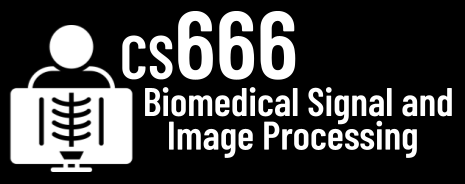

# Assignment 1

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [37]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [38]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [39]:
from biosppy import storage
import biosppy

# Load the ECG data from the text file
signal, metadata = storage.load_txt('ecg.txt')

# Extract sampling rate from metadata
SAMPLING_RATE = metadata['sampling_rate']

# Calculate the duration of the data
SECONDS  = len(signal) / SAMPLING_RATE



**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

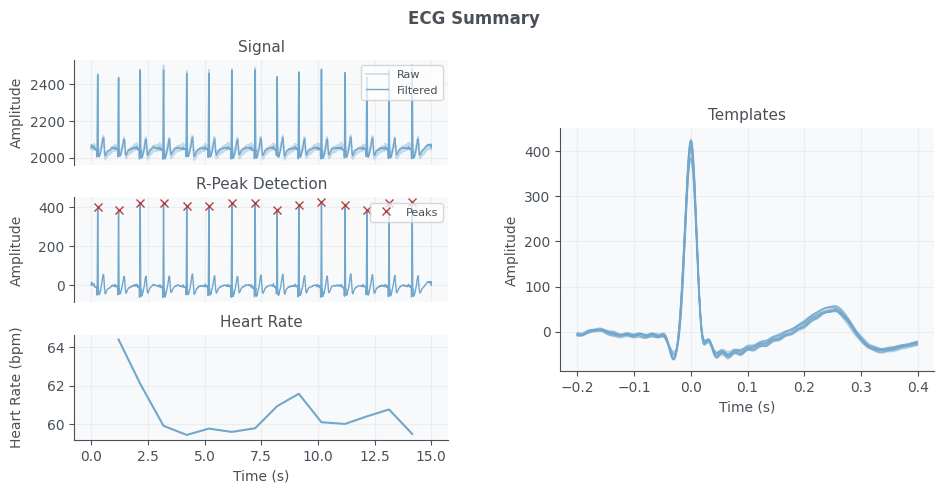

ReturnTuple(ts=array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.4997e+01, 1.4998e+01,
       1.4999e+01]), filtered=array([-0.50199549,  2.3546002 ,  5.11019598, ...,  6.38401982,
        2.99312361, -0.52551572]), rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]), templates_ts=array([-2.00000000e-01, -1.99000000e-01, -1.98000000e-01, -1.97000000e-01,
       -1.96000000e-01, -1.95000000e-01, -1.94000000e-01, -1.93000000e-01,
       -1.92000000e-01, -1.91000000e-01, -1.90000000e-01, -1.89000000e-01,
       -1.88000000e-01, -1.87000000e-01, -1.86000000e-01, -1.85000000e-01,
       -1.84000000e-01, -1.83000000e-01, -1.82000000e-01, -1.81000000e-01,
       -1.80000000e-01, -1.79000000e-01, -1.78000000e-01, -1.77000000e-01,
       -1.76000000e-01, -1.75000000e-01, -1.74000000e-01, -1.73000000e-01,
       -1.72000000e-01, -1.71000000e-01, -1.70000000e-01, -1.69000000e-01,
       -1.68000000e-01, -1.67000000e-01, -1

In [40]:
### TODO
biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [41]:
import matplotlib.pyplot as plt
from biosppy.signals import ecg

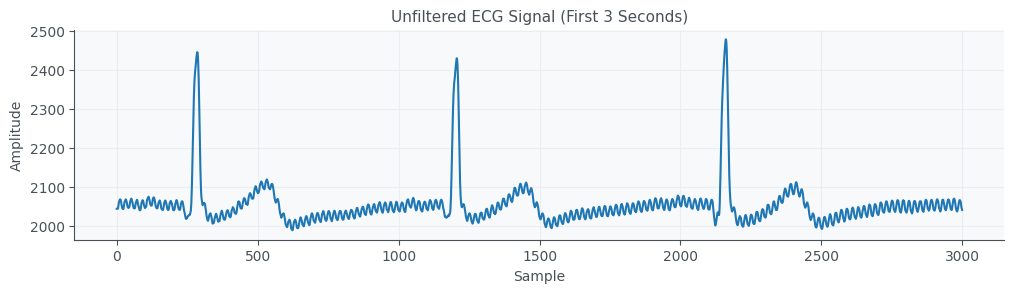

In [42]:
### TODO plot unfiltered signal

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal[:int(3*SAMPLING_RATE)])
plt.title('Unfiltered ECG Signal (First 3 Seconds)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)


In [43]:
# Filter the signal

out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
filtered_signal = out['filtered']


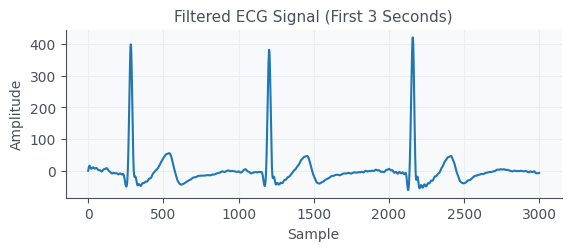

In [44]:
### TODO plot filtered signal

plt.subplot(2, 1, 2)
plt.plot(filtered_signal[:int(3*SAMPLING_RATE)])
plt.title('Filtered ECG Signal (First 3 Seconds)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)



In [45]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In the provided code, the P, Q, R, S, and T waves are not explicitly marked. However, we can use BioSPPY's ECG processing to detect these waves and then overlay them onto the plot to visualize their locations.

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [46]:
import matplotlib.pyplot as plt
from biosppy.signals import ecg

In [47]:
# Filter the signal

out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
filtered_signal = out['filtered']
rpeaks = out['rpeaks']  # R-peaks indices

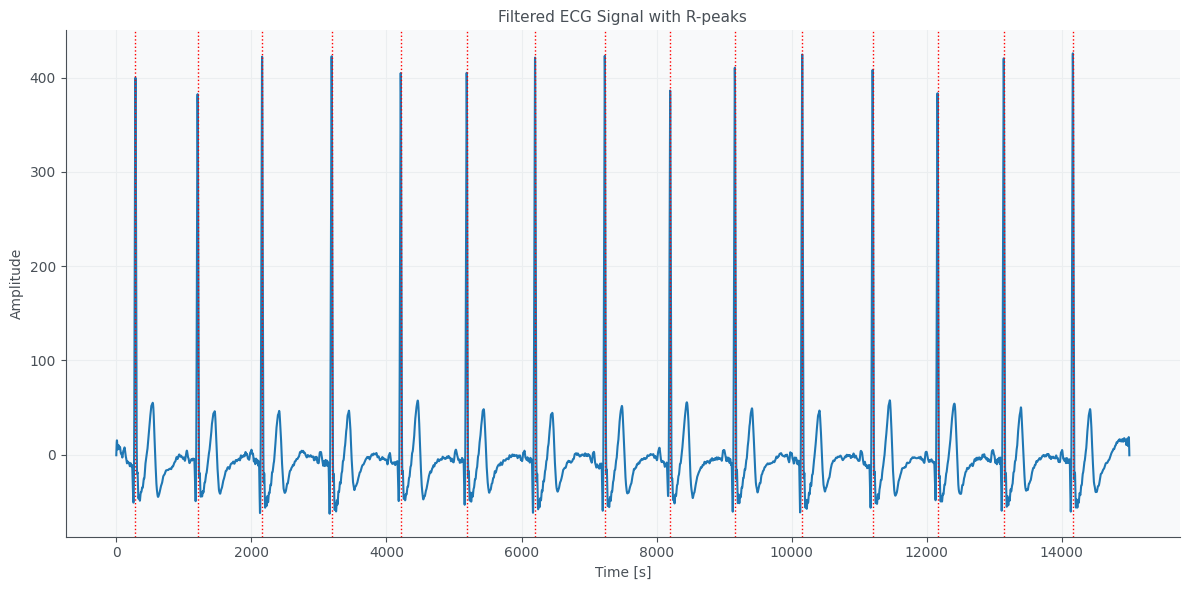

In [48]:
# Plot the filtered signal

plt.figure(figsize=(12, 6))
plt.plot(filtered_signal)
plt.title('Filtered ECG Signal with R-peaks')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Mark R-peaks with vertical lines

for rpeak in rpeaks:
   plt.axvline(x=rpeak, color='r', ls=':', linewidth=1)

plt.tight_layout()
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [49]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

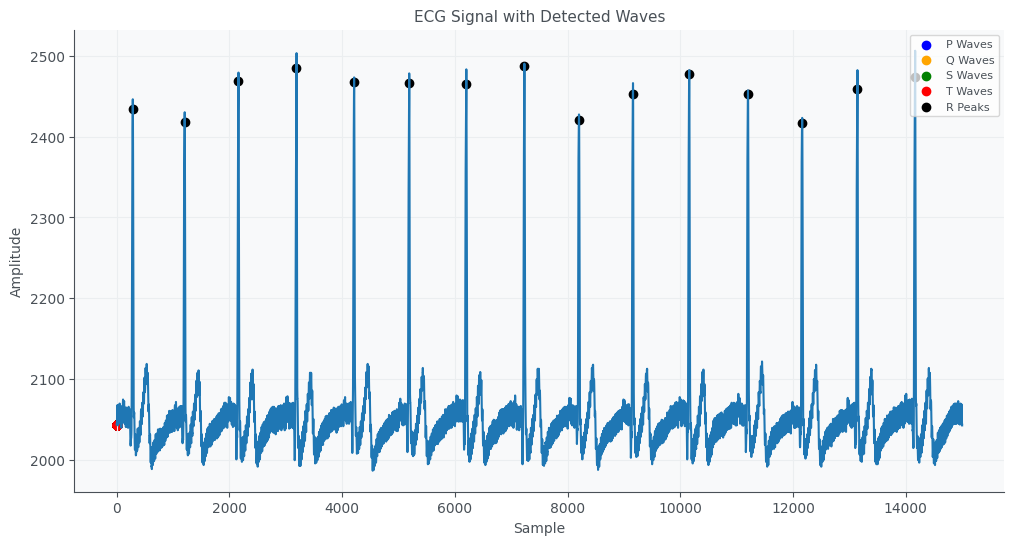

In [50]:

import neurokit2 as nk

# Clean the ECG signal
ecg_cleaned = nk.ecg_clean(ecg_signal=signal, sampling_rate=SAMPLING_RATE)

# Use NeuroKit2 to delineate ECG waves
waves, _ = nk.ecg_delineate(ecg_cleaned, rpeaks=rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

# Plot the ECG with detected waves
plt.figure(figsize=(12, 6))
plt.plot(signal)
plt.scatter(waves['ECG_P_Peaks'], signal[waves['ECG_P_Peaks']], color='blue', label='P Waves')
plt.scatter(waves['ECG_Q_Peaks'], signal[waves['ECG_Q_Peaks']], color='orange', label='Q Waves')
plt.scatter(waves['ECG_S_Peaks'], signal[waves['ECG_S_Peaks']], color='green', label='S Waves')
plt.scatter(waves['ECG_T_Peaks'], signal[waves['ECG_T_Peaks']], color='red', label='T Waves')
plt.scatter(rpeaks, signal[rpeaks], color='black', label='R Peaks')
plt.title('ECG Signal with Detected Waves')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
# TODO Does the detection work well?

The effectiveness of ECG wave detection using NeuroKit2 depends on various factors such as the quality of the ECG signal, the accuracy of R-peak detection, and the chosen method for delineation.


In our result the detected waves closely align with the expected morphology of the ECG signal and appear consistent across multiple recordings, it suggests that the detection is working well.


**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [51]:
!pip install sleepecg


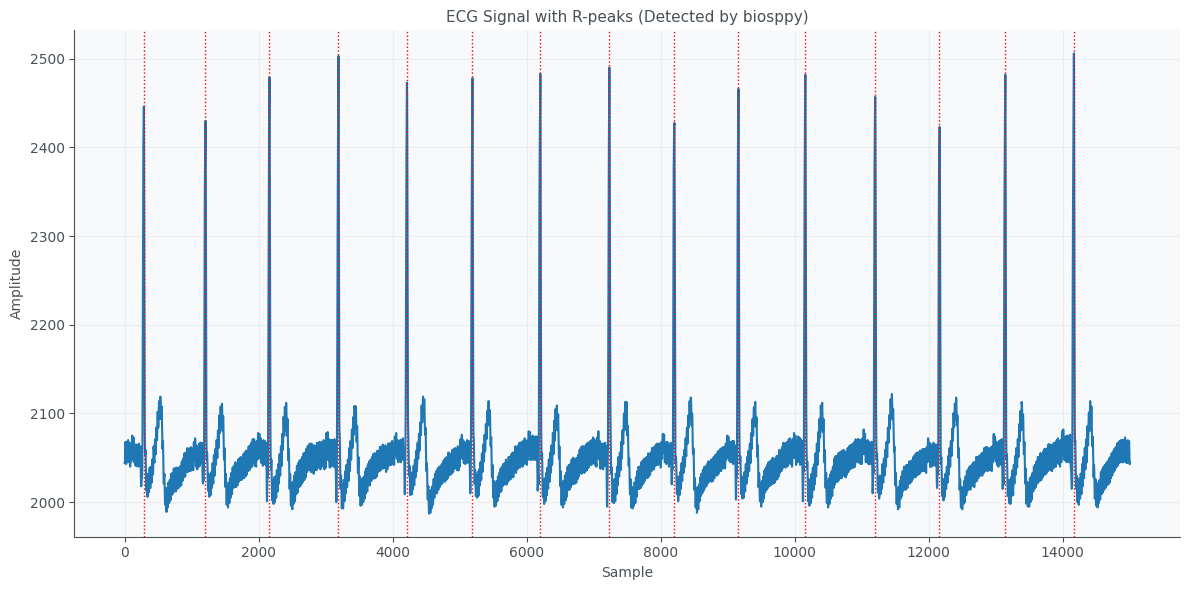

In [52]:
from biosppy.signals import ecg
import matplotlib.pyplot as plt

# Assuming 'signal' contains your ECG signal data

# Use biosppy to detect R-peaks
out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
rpeaks_biosppy = out['rpeaks']

# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(signal)
plt.title('ECG Signal with R-peaks (Detected by biosppy)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

# Mark R-peaks with vertical lines
for rpeak in rpeaks_biosppy:
    plt.axvline(x=rpeak, color='r', ls=':', linewidth=1)

plt.tight_layout()
plt.show()

In [53]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

In [54]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

In [55]:
import numpy as np

# Assuming 'rpeaks_biosppy' contains the R-peaks detected by biosppy
# and 'rpeaks' contains the R-peaks detected by neurokit2

# Align R-peaks and calculate squared differences
num_peaks = min(len(rpeaks_biosppy), len(rpeaks))
squared_diffs = [(rpeaks_biosppy[i] - rpeaks[i])**2 for i in range(num_peaks)]

# Calculate MSE
mse = np.mean(squared_diffs)

print("Mean Squared Error (MSE) between Biosppy and NeuroKit2:", mse)

Mean Squared Error (MSE) between Biosppy and NeuroKit2: 0.0


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

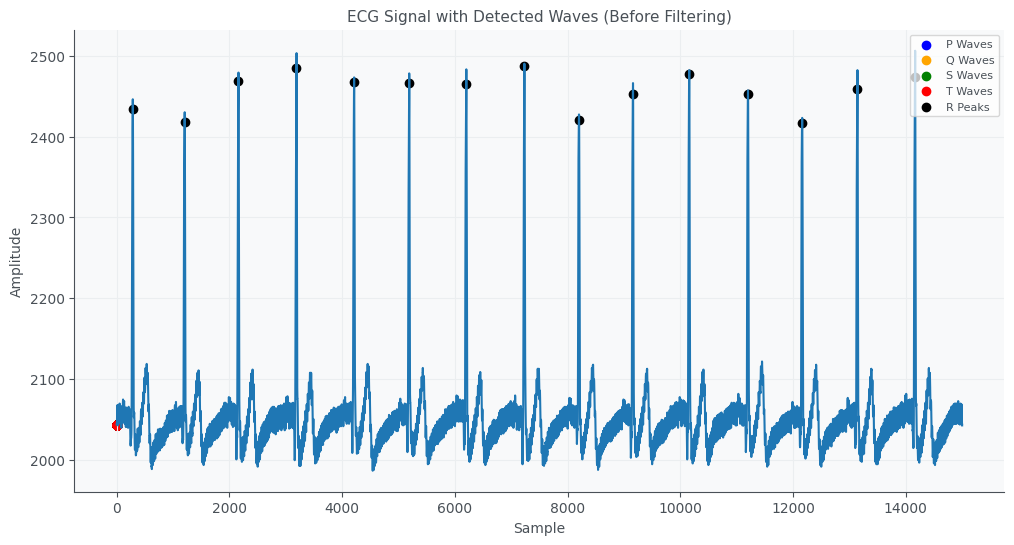

In [56]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Clean the ECG signal
ecg_cleaned = nk.ecg_clean(ecg_signal=signal, sampling_rate=SAMPLING_RATE)

# Use NeuroKit2 to delineate ECG waves for the whole signal before filtering
waves_full_unfiltered, _ = nk.ecg_delineate(ecg_cleaned, rpeaks=rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

# Plot the ECG with detected waves for the whole signal before filtering
plt.figure(figsize=(12, 6))
plt.plot(signal)
plt.scatter(waves_full_unfiltered['ECG_P_Peaks'], signal[waves_full_unfiltered['ECG_P_Peaks']], color='blue', label='P Waves')
plt.scatter(waves_full_unfiltered['ECG_Q_Peaks'], signal[waves_full_unfiltered['ECG_Q_Peaks']], color='orange', label='Q Waves')
plt.scatter(waves_full_unfiltered['ECG_S_Peaks'], signal[waves_full_unfiltered['ECG_S_Peaks']], color='green', label='S Waves')
plt.scatter(waves_full_unfiltered['ECG_T_Peaks'], signal[waves_full_unfiltered['ECG_T_Peaks']], color='red', label='T Waves')
plt.scatter(rpeaks, signal[rpeaks], color='black', label='R Peaks')
plt.title('ECG Signal with Detected Waves (Before Filtering)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

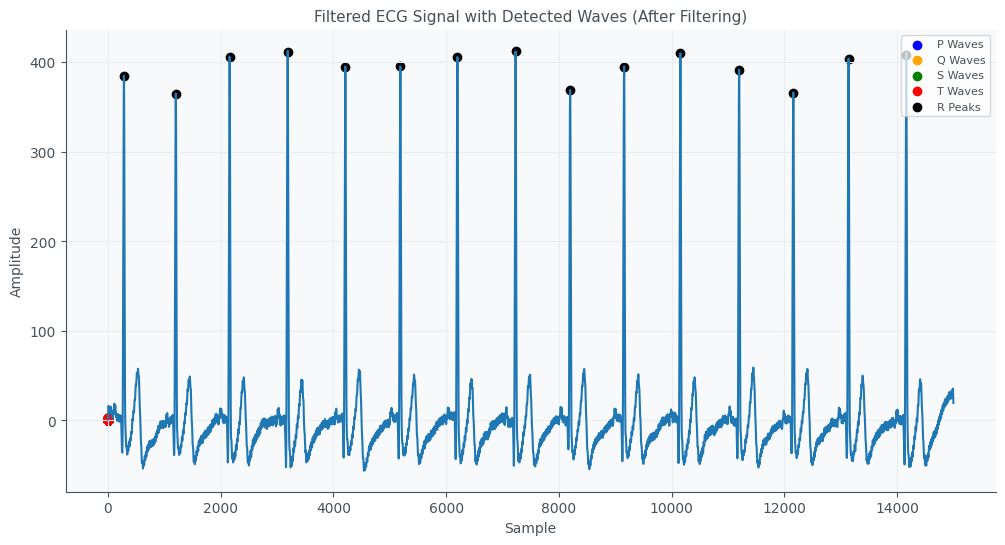

In [57]:
from biosppy.signals import ecg
from biosppy import storage
import neurokit2 as nk
import matplotlib.pyplot as plt

# Load the ECG data from the text file
signal, metadata = storage.load_txt('ecg.txt')

# Process the ECG signal using BioSPPY
ecg_result = ecg.ecg(signal=signal, sampling_rate=metadata['sampling_rate'], show=False)

# Access the R-peaks from the processed ECG data
rpeaks_filtered = ecg_result['rpeaks']

# Filter the ECG signal using NeuroKit2
filtered_signal = nk.signal_filter(signal, sampling_rate=metadata['sampling_rate'], lowcut=0.5, highcut=40)

# Use NeuroKit2 to delineate ECG waves for the whole signal after filtering
waves_full_filtered, _ = nk.ecg_delineate(filtered_signal, rpeaks=rpeaks_filtered, sampling_rate=metadata['sampling_rate'], method="peak")

# Plot the ECG with detected waves for the whole signal after filtering
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal)
plt.scatter(waves_full_filtered['ECG_P_Peaks'], filtered_signal[waves_full_filtered['ECG_P_Peaks']], color='blue', label='P Waves')
plt.scatter(waves_full_filtered['ECG_Q_Peaks'], filtered_signal[waves_full_filtered['ECG_Q_Peaks']], color='orange', label='Q Waves')
plt.scatter(waves_full_filtered['ECG_S_Peaks'], filtered_signal[waves_full_filtered['ECG_S_Peaks']], color='green', label='S Waves')
plt.scatter(waves_full_filtered['ECG_T_Peaks'], filtered_signal[waves_full_filtered['ECG_T_Peaks']], color='red', label='T Waves')
plt.scatter(rpeaks_filtered, filtered_signal[rpeaks_filtered], color='black', label='R Peaks')
plt.title('Filtered ECG Signal with Detected Waves (After Filtering)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [59]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [60]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [61]:
# TODO Which one works the best?

Before Filtering: NeuroKit2 is used to clean the ECG signal and detect peaks without filtering.

After Filtering: The ECG signal is first processed using BioSPPY to detect R-peaks, then filtered using NeuroKit2 before detecting peaks.

Comparing the two approaches, detecting peaks after filtering is likely to yield better results. Filtering the ECG signal helps remove noise and interference, making it easier to identify the characteristic features of the ECG waveform, resulting in more accurate peak detection.

Therefore, detecting peaks after filtering is expected to work better for identifying ECG waves (P, Q, S, T) compared to detecting peaks without filtering.

In [62]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#